In [1]:
import tensorflow as tf
import numpy as np
import time

In [2]:
print (tf.__version__)

2.2.0


In [3]:
model = tf.keras.Sequential(
    tf.keras.layers.Dense(units=1, input_shape=[2])
)

In [4]:
model.compile(
    loss='mean_squared_error',
    metrics=['accuracy'],
    optimizer=tf.keras.optimizers.Adam(0.1)
        
    )

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [6]:
with open('modelsummary.txt', 'w') as f:

    model.summary(print_fn=lambda x: f.write(x + '\n'))

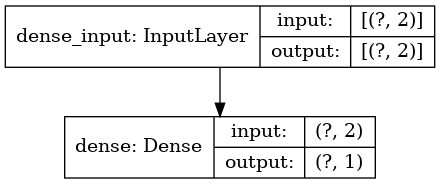

In [7]:
tf.keras.utils.plot_model(
        model,
        to_file='model.png',
        show_layer_names=True,
        show_shapes=True
    )

In [20]:
inputs = np.random.randint(100, size=(10, 2))
outputs = []
for i in inputs:
    #print (5*i[0] - 3*i[1] + 7)
    outputs.append(5*i[0] - 3*i[1] + 7)
outputs = np.array(outputs)

In [21]:
t = time.time()
hist = model.fit(inputs, outputs, epochs=1000, verbose=0)
print (str.format("Training took: {:0.2f} Sec", time.time() - t))


Training took: 3.38 Sec


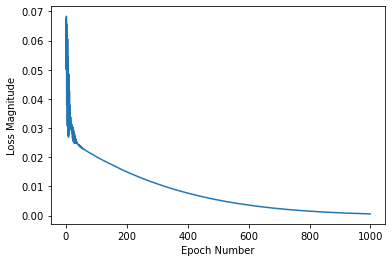

In [22]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['loss']);

In [23]:
model.get_weights()

[array([[ 5.0010557],
        [-2.9991267]], dtype=float32),
 array([6.9112844], dtype=float32)]

In [24]:
model.save('c_to_f.h5')

In [25]:
inputs = np.random.randint(100, size=(5, 2))
outputs = []
for i in inputs:
    #print (5*i[0] - 3*i[1] + 7)
    outputs_1=[]
    outputs_1.append(5*i[0] - 3*i[1] + 7)
    np.array(outputs_1)
    outputs.append(outputs_1)

In [26]:
outputs

[[-88], [344], [38], [-40], [400]]

In [27]:
z_predicted=model.predict(inputs)

In [28]:
z_predicted

array([[-88.01837 ],
       [344.0216  ],
       [ 37.94495 ],
       [-39.994675],
       [400.00027 ]], dtype=float32)

In [29]:
accuracuy= (1-np.mean(abs(np.subtract(z_predicted, outputs))))*100 

In [30]:
accuracuy

97.98744201660156